In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import time
import importlib
import logging
from tqdm import tqdm

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

# limit GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)

logging.info("numpy Version is {}".format(np.__version__))
logging.info("tensorflow Version is {}".format(tf.keras.__version__))
logging.info("\n")

import function as fn
importlib.reload(fn)

INFO:root:numpy Version is 1.19.5
INFO:root:tensorflow Version is 2.4.0
INFO:root:



1 Physical GPUs, 1 Logical GPU


<module 'function' from '/dicos_ui_home/alanchung/ML4NO/TEST/function.py'>

In [2]:
%%time
model = "Regression_Model_Fully_Connected_Dense_std" 

x_train_poisson, y_train, x_test_poisson, y_test = fn.load_data(path="../Data/n1000000_0910_all_flat.npz" , model=model )

INFO:root:X train/test shape: (900000, 144) / (100000, 144)
INFO:root:Y train[0]/test[0] shape (900000,) / (100000,)
INFO:root:Y train[1]/test[1] shape (900000, 2) / (100000, 2)
INFO:root:

INFO:root:x_train_poisson shape: (900000, 144)
INFO:root:x_test_poisson shape: (100000, 144)
INFO:root:



CPU times: user 25.2 s, sys: 4.44 s, total: 29.6 s
Wall time: 29.6 s


In [3]:
%%time
prediction = fn.prediction_function(x_test_poisson, model=model)

INFO:root:prediction[0] shape (100000, 1)
INFO:root:prediction[1] shape (100000, 2)


CPU times: user 2.98 s, sys: 735 ms, total: 3.72 s
Wall time: 3.56 s


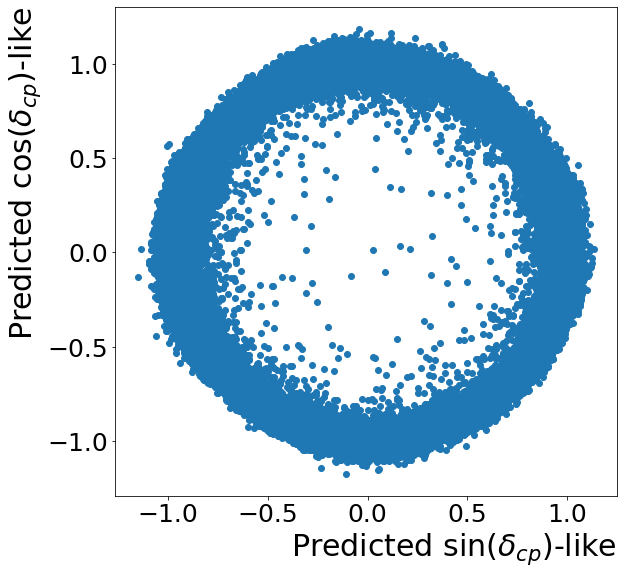

In [4]:
fig, ax = plt.subplots(1,1, figsize=(9,9))

plt.scatter(prediction[1][:,0], prediction[1][:,1])


# plt.scatter(prediction[:,1], prediction[:,2])

# plt.plot(prediction[0],prediction[0])


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.xlabel("Predicted sin($\\delta_{cp}$)-like", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted cos($\\delta_{cp}$)-like", fontsize=30, horizontalalignment='right',y=1)

plt.show()

In [5]:
%%time
if model == "VAE_1DCNN_v1":
    predict_theta23 = prediction[:,0]
    predict_delta = fn.angle_transform(prediction[:,1:])

    true_theta23 = y_test[:,0]
    true_delta = fn.angle_transform(y_test[:,1:])

elif model == "VAE_1DCNN_v2":
    predict_theta23 = prediction[0]
    predict_delta = fn.angle_transform(prediction[1])

    true_theta23 = y_test[0]
    true_delta = fn.angle_transform(y_test[1])    

elif model == "Regression_Model_Fully_Connected_Dense_std":
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_delta = fn.angle_transform(prediction[1])

    true_theta23 = y_test[0]#*6.1+38.9+12.2/2
    true_delta = fn.angle_transform(y_test[1])
    
elif model == "Regression_Model_Fully_Connected_Dense_app_dis":
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_delta = fn.angle_transform(prediction[1])

    true_theta23 = y_test[0]#*6.1+38.9+12.2/2
    true_delta = fn.angle_transform(y_test[1])

logging.info("predict_theta23 shape: {}".format(predict_theta23.shape))
logging.info("predict_delta shape: {}".format(predict_delta.shape))
logging.info("\n")
logging.info("true_theta23 shape: {}".format(true_theta23.shape))
logging.info("true_delta shape: {}".format(true_delta.shape))

INFO:root:predict_theta23 shape: (100000, 1)
INFO:root:predict_delta shape: (100000,)
INFO:root:

INFO:root:true_theta23 shape: (100000,)
INFO:root:true_delta shape: (100000,)


CPU times: user 7.59 ms, sys: 5.4 ms, total: 13 ms
Wall time: 11.2 ms


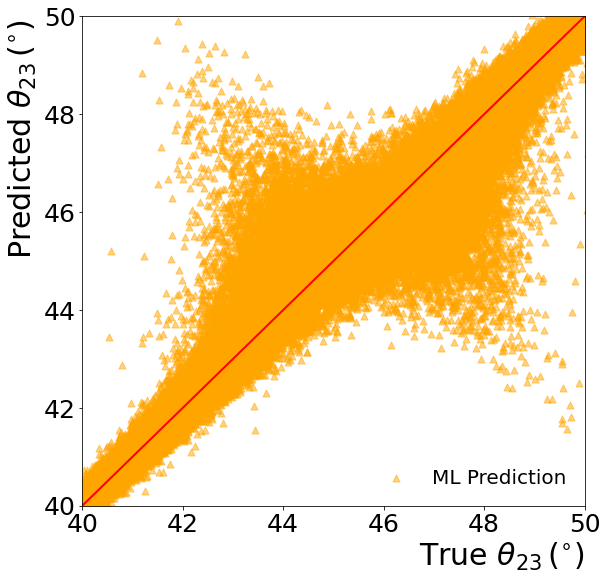

CPU times: user 1.64 s, sys: 48.2 ms, total: 1.69 s
Wall time: 1.68 s


In [6]:
%%time

fig, ax = plt.subplots(1,1, figsize=(9,9))


plt.plot([40, 50],[40, 50], c="r", linewidth=2)
plt.scatter(true_theta23, predict_theta23, color='orange', marker = "^", alpha=0.5, s=50, label="ML Prediction")

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.xlim((0.0008, 2.5))
# plt.xscale("log")
plt.xlim((40, 50))
plt.ylim((40, 50))
plt.xlabel("True $\\theta_{23}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\\theta_{23}\,(^{\circ})$ ", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Plots/DUNE_theta23_"+str(len(theta23_true))+"_the_best_model_"+str(plot_name)+".png", transparent=True, bbox_inches='tight') 


plt.show()

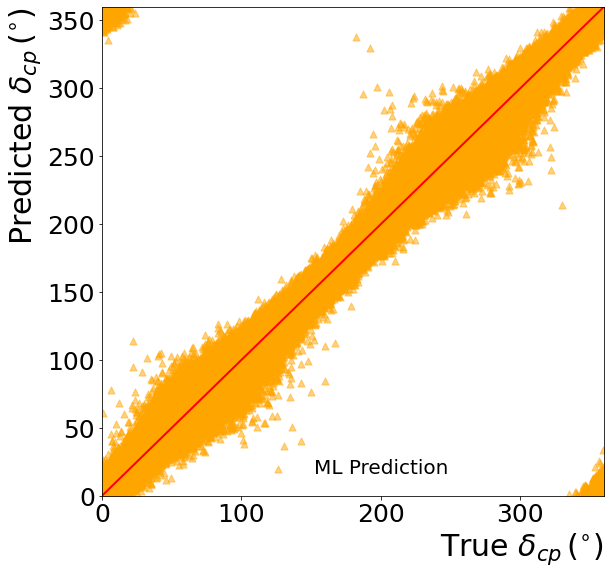

CPU times: user 2.7 s, sys: 35.8 ms, total: 2.73 s
Wall time: 2.73 s


In [7]:
%%time

fig, ax = plt.subplots(1,1, figsize=(9,9))

plt.plot([0, 360],[0, 360], c="r", linewidth=2)

plt.scatter(true_delta, predict_delta, color='orange', marker = "^", alpha=0.5, s=50, label="ML Prediction")


# plt.text(x=20,y=300, s=str(ordering), fontsize=25 )
# plt.text(x=200,y=53.3, s=str(ordering), fontsize=25 )


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.xlim((0, 360))
plt.ylim((0, 360))
plt.xlabel("True $\delta_{cp}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\delta_{cp}\,(^{\circ})$", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Plots/DUNE_deltacp_"+str(len(delta_true))+"_the_best_model_"+str(plot_name)+".png", transparent=True, bbox_inches='tight') 


plt.show()

In [8]:
%%time

IO_or_NO = 0
true_theta_23, trua_delta, test_data = fn.load_test_data(model=model, IO_or_NO = IO_or_NO , N = 1000000 )

prediction = fn.prediction_function(test_data, model=model)

if model == "VAE_1DCNN_v1":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[:,0]
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[:,1:])


elif model == "VAE_1DCNN_v2":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])


elif model == "Regression_Model_Fully_Connected_Dense_std":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])

elif model == "Regression_Model_Fully_Connected_Dense_app_dis":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])
    

logging.info("predict_theta23 shape: {}".format(predict_theta23.shape))
logging.info("predict_delta shape: {}".format(predict_delta.shape))

INFO:root:NO
INFO:root:True point: theta_23 = 49.00 \delta_cp = 195.00
INFO:root:Test NO Data Shape:(144,)
INFO:root:X train/test shape: (1000000, 144)
INFO:root:

INFO:root:prediction[0] shape (1000000, 1)
INFO:root:prediction[1] shape (1000000, 2)
INFO:root:Model: Regression_Model_Fully_Connected_Dense_std
INFO:root:predict_theta23 shape: (1000000,)
INFO:root:predict_delta shape: (1000000,)


CPU times: user 48 s, sys: 7.33 s, total: 55.3 s
Wall time: 52.5 s


In [9]:
%%time
#Import txt檔

if IO_or_NO == 0:
    f_DUNE_NO = open("../Data/one_sigma_contour_DUNE_NO.dat")
    theta23_DUNE_NO = []
    delta_cp_DUNE_NO = []
    chi_DUNE_NO = []

    while True:
        s = f_DUNE_NO.readline().split()
        array = []
        for j in range(len(s)) :
            array.append(float(s[j]))
        if(len(array)>0):
            theta23_DUNE_NO.append(array[0])
            delta_cp_DUNE_NO.append(array[1]) 
            chi_DUNE_NO.append(array[2])
        else:
            break
            
    theta23_DUNE_NO = np.array(theta23_DUNE_NO)
    delta_cp_DUNE_NO = np.array(delta_cp_DUNE_NO)
    chi_DUNE_NO = np.array(chi_DUNE_NO)
    
    
    # DUNE_NO
    a0 = min(theta23_DUNE_NO)*100-300
    b0 = max(theta23_DUNE_NO)*100 + 300
    c0 = min(delta_cp_DUNE_NO)*10-60
    d0 = max(delta_cp_DUNE_NO)*10+60
    x0 = np.linspace(int(a0), int(b0), int((b0 - a0) + 1))/100
    y0 = np.linspace(int(c0), int(d0), int(d0 - c0 + 1))/10
    X0, Y0 = np.meshgrid(x0, y0)
    Z0 = np.zeros((len(X0),len(X0[0])))

    for i in range(len(theta23_DUNE_NO)):
        a = np.where(X0 == theta23_DUNE_NO[i])[1][0]
        b = np.where(Y0 == delta_cp_DUNE_NO[i])[0][0]
        Z0[b][a] = 1
            
elif IO_or_NO == 1:   
    f_DUNE_IO = open("../Data/one_sigma_contour_DUNE_IO.dat")
    theta23_DUNE_IO = []
    delta_cp_DUNE_IO = []
    chi_DUNE_IO = []

    while True:
        s = f_DUNE_IO.readline().split()
        array = []
        for j in range(len(s)) :
            array.append(float(s[j])) 
        if(len(array)>0):
            theta23_DUNE_IO.append(array[0])
            delta_cp_DUNE_IO.append(array[1]) 
            chi_DUNE_IO.append(array[2])
        else:
            break

    theta23_DUNE_IO = np.array(theta23_DUNE_IO)
    delta_cp_DUNE_IO = np.array(delta_cp_DUNE_IO)
    chi_DUNE_IO = np.array(chi_DUNE_IO)

    # DUNE_IO
    a0 = min(theta23_DUNE_IO)*100-300
    b0 = max(theta23_DUNE_IO)*100 + 300
    c0 = min(delta_cp_DUNE_IO)*10-60
    d0 = max(delta_cp_DUNE_IO)*10+60
    x0 = np.linspace(int(a0), int(b0), int((b0 - a0) + 1))/100
    y0 = np.linspace(int(c0), int(d0), int(d0 - c0 + 1))/10
    X0, Y0 = np.meshgrid(x0, y0)
    Z0 = np.zeros((len(X0),len(X0[0])))

    for i in range(len(theta23_DUNE_IO)):
        a = np.where(X0 == theta23_DUNE_IO[i])[1][0]
        b = np.where(Y0 == delta_cp_DUNE_IO[i])[0][0]
        Z0[b][a] = 1

CPU times: user 27.8 s, sys: 640 ms, total: 28.4 s
Wall time: 28.4 s


In [10]:
%%time

input_theta23 = predict_theta23
input_theta23 = input_theta23.reshape(len(input_theta23),)
input_delta = predict_delta


# bins_theta23_globes = np.linspace(0, 360, int(360/(x0[1]-x0[0])))
# bins_delta_globes  = np.linspace(0, 360, int(360/(y0[1]-y0[0])))

bins_theta23_globes = np.linspace(0, 360, 3600)
bins_delta_globes  = np.linspace(0, 360, 600)

likeliregion, xedges, yedges = np.histogram2d(input_theta23, input_delta, bins = [bins_theta23_globes, bins_delta_globes])
likeliregion = likeliregion.T

max_poi = np.where(likeliregion == likeliregion.max())
print("Maximum: theta23 {}, delta {} ".format(xedges[max_poi[1]],yedges[max_poi[0]]))
sorted_list = np.sort(likeliregion.reshape((len(xedges)-1)*(len(yedges)-1)))[::-1]

tot_event_num = sorted_list.sum()

onesigma = 0
for i in range(len(sorted_list)):
    onesigma += sorted_list[i]
    if onesigma/tot_event_num >= 0.68:
        one_sigma_num = sorted_list[i]
        break
        
twosigma = 0
for i in range(len(sorted_list)):
    twosigma += sorted_list[i]        
    if twosigma/tot_event_num >= 0.95:
        two_sigma_num = sorted_list[i]
        break

one_sigma_region = np.where(likeliregion < one_sigma_num, 0, likeliregion )
one_sigma_region_boundary = np.where(one_sigma_region > 0, 1, one_sigma_region )
one_sigma_allowed_region = np.where(one_sigma_region_boundary != 0)

two_sigma_region = np.where(likeliregion < two_sigma_num, 0, likeliregion )
two_sigma_region_boundary = np.where(two_sigma_region > 0, 1, two_sigma_region )
two_sigma_allowed_region = np.where(two_sigma_region_boundary != 0)

xaxis, yaxis = (xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2

Maximum: theta23 [49.11364268], delta [194.7245409] 
CPU times: user 192 ms, sys: 20 ms, total: 212 ms
Wall time: 210 ms


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: No contour levels were found within the data range.


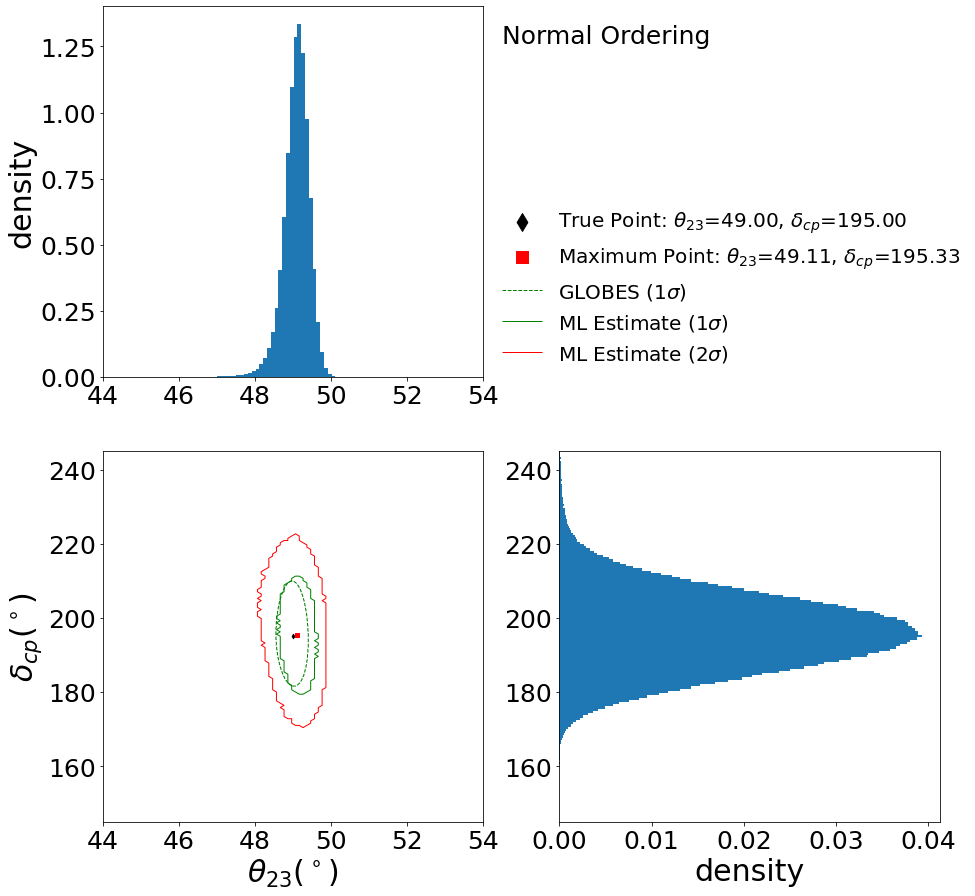

CPU times: user 6.97 s, sys: 542 ms, total: 7.51 s
Wall time: 7.5 s


In [11]:
%%time

fig, ax = plt.subplots(1,1, figsize=(15,15))

#=========================== Upper Left Corner
plot_axis = plt.subplot(2,2,1)
"""
ML
"""
plot_axis.hist(input_theta23,density=1,bins=bins_theta23_globes)
if IO_or_NO == 0:
    plot_axis.set_xlim((44,54))
elif IO_or_NO == 1:
    plot_axis.set_xlim((44,54))
plot_axis.tick_params(axis='x', labelsize=25)
plot_axis.tick_params(axis='y', labelsize=25)
plot_axis.set_ylabel(r'density', fontsize=30)
#===========================




#=========================== Down Right Corner
plot_axis = plt.subplot(2,2,4)
"""
ML
"""
plot_axis.hist(input_delta,orientation="horizontal",density=1, bins=bins_delta_globes)
if IO_or_NO == 0:
    plot_axis.set_ylim((145,245))
elif IO_or_NO == 1:
    plot_axis.set_ylim((236, 336))
plot_axis.tick_params(axis='x', labelsize=25)
plot_axis.tick_params(axis='y', labelsize=25)
plot_axis.set_xlabel(r'density', fontsize=30)
#===========================


#=========================== Down Left Corner
plot_axis = plt.subplot(2,2,3)


if IO_or_NO == 0:
    plot_axis.scatter(true_theta_23, trua_delta, marker="d", c="k", s=10, label = "True Point: $\\theta_{23}$=%.2f, $\delta_{cp}$=%.2f" %(true_theta_23, trua_delta))
else:
    plot_axis.scatter(true_theta_23, trua_delta, marker="d", c="k", s=10, label = "True Point: $\\theta_{23}$=%.2f, $\delta_{cp}$=%.2f" %(true_theta_23, trua_delta))

plot_axis.scatter(xedges[max_poi[1]],yedges[max_poi[0]+1], marker="s", c="r", s=10, label = "Maximum Point: $\\theta_{23}$=%.2f, $\delta_{cp}$=%.2f" %(xedges[max_poi[1]][0], yedges[max_poi[0]+1][0]))
# plot_axis.scatter(xedges_asimov[max_poi_asimov[1]],yedges_asimov[max_poi_asimov[0]], marker="d", c="blue", s=5, label = "maximum point: $\\theta_{23}$=%.2f, $\delta_{cp}$=%.2f" %(xedges_asimov[max_poi_asimov[1]][0], yedges_asimov[max_poi_asimov[0]][0]))

    
"""
globes
"""
DU = plot_axis.contour(X0, Y0, Z0, 0, colors='green', linestyles="--", linewidths=1 )
DU.collections[0].set_label("GLOBES (1$\sigma$)")

# DU_IO = plot_axis.contour(X1, Y1, Z1, 0, colors='green', linestyles="--", linewidths=1 )
# DU_IO.collections[0].set_label("GLOBES (1$\sigma$)")


"""
ML (Poisson)
"""
CS_1_sigma = plt.contour(xaxis, yaxis, one_sigma_region_boundary, 0, colors='green', linestyles="-", linewidths=1)
CS_2_sigma = plt.contour(xaxis, yaxis, two_sigma_region_boundary, 0, colors='red', linestyles="-", linewidths=1)
CS_1_sigma.collections[0].set_label("ML Estimate (1$\sigma$)")
CS_2_sigma.collections[0].set_label("ML Estimate (2$\sigma$)")


plot_axis.set_xlabel(r'$\theta_{23} $($^\circ$)', fontsize=30)
plot_axis.set_ylabel(r'$\delta_{cp} $($^\circ$)', fontsize=30)
if IO_or_NO == 0:
    plot_axis.set_ylim((145,245))
    plot_axis.set_xlim((44,54))
elif IO_or_NO == 1:
    plot_axis.set_ylim((236, 336))
    plot_axis.set_xlim((44,54))
else:
    raise ValueError("aaaa")
    
    
plot_axis.tick_params(axis='x', labelsize=25)
plot_axis.tick_params(axis='y', labelsize=25)
#===========================
                              
    

#=========================== Whole Figure Setting

if IO_or_NO == 0:
    plt.text(x=54.5,y=355, s="Normal Ordering", fontsize=25 )
#     plt.text(x=54.5,y=340, s= str(index)+" Training", fontsize=25 )
    
elif IO_or_NO == 1:
    plt.text(x=54.5,y=440, s="Inverse Ordering", fontsize=25 )
#     plt.text(x=54.5,y=430, s= str(index)+" Training", fontsize=25 ) 
    
# plt.subplots_adjust(wspace=0.15, hspace=0.01)
plt.legend(bbox_to_anchor=(2.3, 1.7), ncol=1,fontsize=20, markerscale=4, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Plots/"+str(experiment)+"_"+str("to_5GeV")+"_"+str("IO_")+str(index)+".pdf", transparent=True, bbox_inches='tight') 
plt.show()

In [12]:
%%time

if IO_or_NO == 0:
    ordering = "Normal Ordering"
    plot_name = "NO"
    
elif IO_or_NO == 1:
    ordering = "Inverse Ordering"
    plot_name = "IO"
    
mc_data, theta23_true, delta_true, theta23_best_fit, delta_best_fit = fn.accuracy_study_sample(IO_or_NO = IO_or_NO, model = model )

INFO:root:NO
INFO:root:MC Data Shape:(1000, 144)
INFO:root:theta23 true Shape:(1000,)
INFO:root:delta true Shape:(1000,)
INFO:root:theta23 best fit Shape:(1000,)
INFO:root:delta best fit Shape:(1000,)


CPU times: user 3.5 s, sys: 2.61 s, total: 6.11 s
Wall time: 6.11 s


In [13]:
%%time

prediction = fn.prediction_function(mc_data, model=model)

if model == "VAE_1DCNN_v1":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[:,0]
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[:,1:])


elif model == "VAE_1DCNN_v2":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])


elif model == "Regression_Model_Fully_Connected_Dense_std":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])

elif model == "Regression_Model_Fully_Connected_Dense_app_dis":
    logging.info("Model: {}".format(model))
    predict_theta23 = prediction[0]#*6.1+38.9+12.2/2
    predict_theta23 = predict_theta23.reshape(len(predict_theta23),)
    predict_delta = fn.angle_transform(prediction[1])


logging.info("predict_theta23 shape: {}".format(predict_theta23.shape))
logging.info("predict_delta shape: {}".format(predict_delta.shape))


def deltacp_min(predict_delta, delta_true):
    return np.minimum(abs(predict_delta-delta_true), abs(predict_delta-(delta_true-360)), abs(predict_delta-(360-delta_true)))

logging.info("ML theta23 MSE: {:.4f}".format(np.mean(np.square(predict_theta23-theta23_true))))
logging.info("Globes theta23 MSE: {:.4f}".format(np.mean(np.square(theta23_best_fit-theta23_true))))
logging.info("ML deltacp MSE: {:.4f}".format(np.mean(np.square(deltacp_min(predict_delta, delta_true)))))
logging.info("Globes deltacp MSE: {:.4f}".format(np.mean(np.square(deltacp_min(delta_best_fit, delta_true)))))

INFO:root:prediction[0] shape (1000, 1)
INFO:root:prediction[1] shape (1000, 2)
INFO:root:Model: Regression_Model_Fully_Connected_Dense_std
INFO:root:predict_theta23 shape: (1000,)
INFO:root:predict_delta shape: (1000,)
INFO:root:ML theta23 MSE: 0.3248
INFO:root:Globes theta23 MSE: 0.7166
INFO:root:ML deltacp MSE: 600.3244
INFO:root:Globes deltacp MSE: 715.2594


CPU times: user 132 ms, sys: 35.1 ms, total: 167 ms
Wall time: 154 ms


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


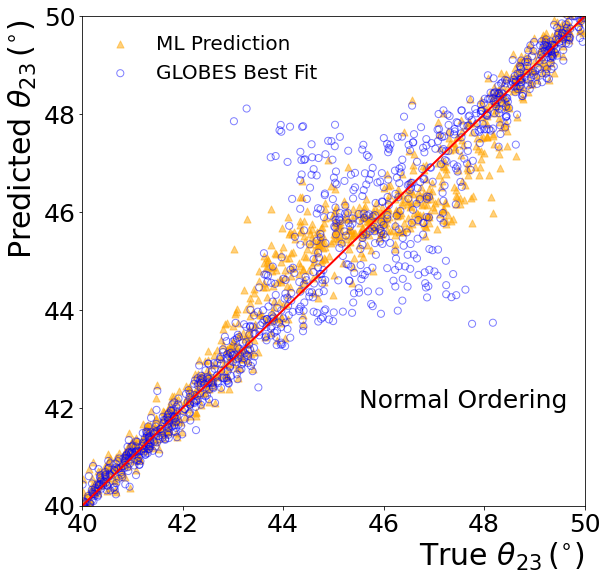

CPU times: user 217 ms, sys: 19.1 ms, total: 236 ms
Wall time: 233 ms


In [14]:
%%time

fig, ax = plt.subplots(1,1, figsize=(9,9))


plt.plot([40, 50],[40, 50], c="r", linewidth=2)
plt.scatter(theta23_true, predict_theta23, color='orange', marker = "^", alpha=0.5, s=50, label="ML Prediction")
plt.scatter(theta23_true, theta23_best_fit, marker='o',c='',edgecolors='blue', alpha=0.5, s=50, label="GLOBES Best Fit")
# plt.text(x=45.5,y=41, s=str(ordering), fontsize=25 )
plt.text(x=45.5,y=42, s=str(ordering), fontsize=25 )

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.xlim((0.0008, 2.5))
# plt.xscale("log")
plt.xlim((40, 50))
plt.ylim((40, 50))
plt.xlabel("True $\\theta_{23}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\\theta_{23}\,(^{\circ})$ ", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Plots/DUNE_theta23_"+str(len(theta23_true))+"_the_best_model_"+str(plot_name)+".png", transparent=True, bbox_inches='tight') 


plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


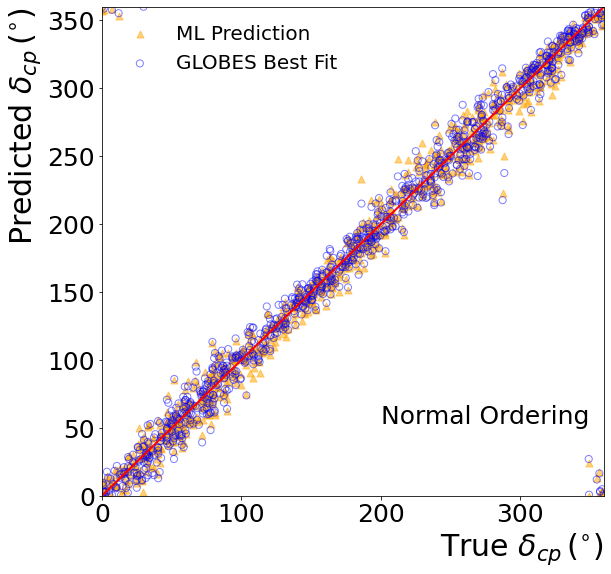

CPU times: user 213 ms, sys: 14 ms, total: 227 ms
Wall time: 224 ms


In [15]:
%%time

fig, ax = plt.subplots(1,1, figsize=(9,9))

plt.plot([0, 360],[0, 360], c="r", linewidth=2)

plt.scatter(delta_true, predict_delta, color='orange', marker = "^", alpha=0.5, s=50, label="ML Prediction")
plt.scatter(delta_true, delta_best_fit, marker='o',c='',edgecolors='blue', alpha=0.5, s=50, label="GLOBES Best Fit")


# plt.text(x=20,y=300, s=str(ordering), fontsize=25 )
plt.text(x=200,y=53.3, s=str(ordering), fontsize=25 )


ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.xlim((0, 360))
plt.ylim((0, 360))
plt.xlabel("True $\delta_{cp}\,(^{\circ})$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("Predicted $\delta_{cp}\,(^{\circ})$", fontsize=30, horizontalalignment='right',y=1)
# plt.grid()

plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Plots/DUNE_deltacp_"+str(len(delta_true))+"_the_best_model_"+str(plot_name)+".png", transparent=True, bbox_inches='tight') 


plt.show()

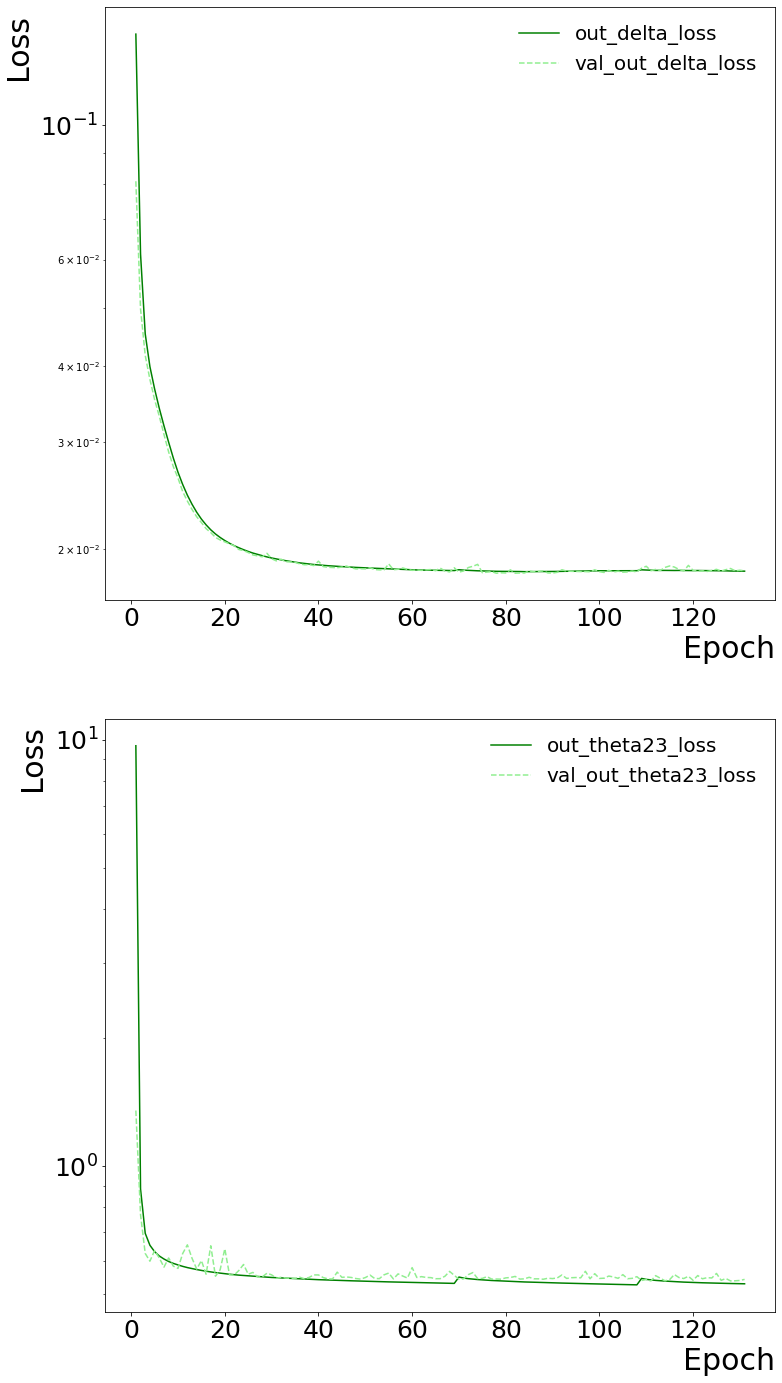

CPU times: user 621 ms, sys: 29 ms, total: 650 ms
Wall time: 649 ms


In [16]:
%%time

fig, ax = plt.subplots(2,1, figsize=(12,24))

training_log = pd.read_csv("./Training_loss/training_log_10.csv")
for i in range(20,40,10):
    training_log_tmp = pd.read_csv("./Training_loss/training_log_"+str(i)+".csv")
    training_log = pd.concat([training_log, training_log_tmp], ignore_index=True, axis=0,join='inner')



ax[0].plot(training_log.index+1, training_log["out_delta_loss"], "-", color='g', label="out_delta_loss")
ax[0].plot(training_log.index+1, training_log["val_out_delta_loss"], "--", color='lightgreen', label="val_out_delta_loss")

ax[0].set_yscale("log")

ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)

ax[0].legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)

ax[0].set_xlabel("Epoch", fontsize=30,horizontalalignment='right',x=1) 
ax[0].set_ylabel("Loss ", fontsize=30, horizontalalignment='right',y=1)


ax[1].plot(training_log.index+1, training_log["out_theta23_loss"], "-", color='g', label="out_theta23_loss")
ax[1].plot(training_log.index+1, training_log["val_out_theta23_loss"], "--", color='lightgreen', label="val_out_theta23_loss")

ax[1].set_yscale("log")

ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25)

ax[1].legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)

ax[1].set_xlabel("Epoch", fontsize=30,horizontalalignment='right',x=1) 
ax[1].set_ylabel("Loss ", fontsize=30, horizontalalignment='right',y=1)

# ax[0].set_ylim((0,0.02))
# ax[1].set_ylim((0,0.6))

# ax[0].set_xlim((80, 140))
# ax[1].set_xlim((80, 140))
# plt.yscale("log")
# # plt.xlim((5))
# ax[0].set_ylim((0.015,0.035))
# ax[1].set_xlabel("Epoch", fontsize=30,horizontalalignment='right',x=1) 
# ax[1].set_ylabel("Val Loss ", fontsize=30, horizontalalignment='right',y=1)
# # plt.grid()

# ax[1].legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
 

plt.show()